El rendimiento de los jugadores de f ́utbol puede verse afectado por
m ́ultiples factores externos como las condiciones clim ́aticas, el estado del
campo, si juegan como local o visitante, la hora del partido, entre otros.
La problem ́atica es decidir si es posible determinar la periodicidad de los
rendimientos excepcionales de los jugadores, as ́ı como los factores que
intervienen en estos rendimientos durante una temporada

In [6]:
!pip install kmapper

In [7]:
# 1) Instala la librería de Kaggle
!pip install --quiet kaggle

# 2) Sube tu kaggle.json
from google.colab import files
files.upload()

# 3) Configura tu key
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4) Descarga y descomprime el dataset
!kaggle datasets download hugomathien/soccer -p ./SOCCER --unzip

# 5) Carga todos los CSVs en un diccionario
import pandas as pd
from os import listdir
from os.path import isfile, join

csv_folder = "./SOCCER"
csv_files = [f for f in listdir(csv_folder) if isfile(join(csv_folder, f)) and f.endswith(".csv")]

# Cargar todos los CSVs en un diccionario
dfs = {}
for file in csv_files:
    name = file.replace(".csv", "")
    dfs[name] = pd.read_csv(join(csv_folder, file))

# 6) Mostrar los primeros registros de cada DataFrame
for name, df in dfs.items():
    print(f"\n {name} ({df.shape[0]} filas, {df.shape[1]} columnas):")
    print(df.head())


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/hugomathien/soccer
License(s): ODbL-1.0


In [8]:
# 1) Descargar y descomprimir
# !kaggle datasets download hugomathien/soccer -p ./SOCCER --unzip

# 2) Conectar al archivo SQLite
import sqlite3
import pandas as pd
from os.path import join

db_path = "./SOCCER/database.sqlite"
conn = sqlite3.connect(db_path)

# 3) Listar todas las tablas existentes
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]
print("Tablas encontradas en la BD:", tables)

# 4) Cargar cada tabla en un DataFrame
dfs = {}
for table in tables:
    dfs[table] = pd.read_sql_query(f"SELECT * FROM {table}", conn)

# Cierra la conexión
conn.close()

# 5) Mostrar un resumen rápido de los DataFrames
for name, df in dfs.items():
    print(f"\n {name}: {df.shape[0]} filas x {df.shape[1]} columnas")
    display(df.head())   # en Jupyter/Colab esto muestra la tabla bonitamente


Tablas encontradas en la BD: ['sqlite_sequence', 'Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']

 sqlite_sequence: 7 filas x 2 columnas


,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075



 Player_Attributes: 183978 filas x 42 columnas


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0



 Player: 11060 filas x 7 columnas


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154



 Match: 25979 filas x 115 columnas


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67



 League: 11 filas x 3 columnas


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A



 Country: 11 filas x 2 columnas


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy



 Team: 299 filas x 5 columnas


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB



 Team_Attributes: 1458 filas x 25 columnas


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [9]:
import sqlite3
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Conectar a la base de datos
db_path = "./SOCCER/database.sqlite"
conn = sqlite3.connect(db_path)

In [10]:
# Obtener atributos de jugadores y partidos
query = """
    SELECT
        m.date AS match_date,
        m.home_team_api_id,
        m.away_team_api_id,
        m.home_team_goal,
        m.away_team_goal,
        pa.player_api_id,
        pa.overall_rating,
        pa.potential,
        pa.acceleration,
        pa.stamina,
        t.team_long_name,
        l.name AS league_name,
        c.name AS country_name
    FROM Match m
    LEFT JOIN Player_Attributes pa ON m.home_player_1 = pa.player_api_id
    LEFT JOIN Team t ON m.home_team_api_id = t.team_api_id
    LEFT JOIN League l ON m.league_id = l.id
    LEFT JOIN Country c ON m.country_id = c.id
    WHERE pa.date <= m.date
    ORDER BY pa.player_api_id, m.date;
"""

df = pd.read_sql_query(query, conn)

In [11]:
df

,match_date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,player_api_id,overall_rating,potential,acceleration,stamina,team_long_name,league_name,country_name
0,2009-09-13 00:00:00,9867,8371,2,1,2984,65.0,74.0,67.0,38.0,CD Tenerife,Spain LIGA BBVA,Spain
1,2009-09-13 00:00:00,9867,8371,2,1,2984,65.0,67.0,67.0,39.0,CD Tenerife,Spain LIGA BBVA,Spain
2,2009-09-13 00:00:00,9867,8371,2,1,2984,67.0,72.0,70.0,39.0,CD Tenerife,Spain LIGA BBVA,Spain
3,2009-09-13 00:00:00,9867,8371,2,1,2984,73.0,74.0,70.0,39.0,CD Tenerife,Spain LIGA BBVA,Spain
4,2009-09-23 00:00:00,9867,8315,1,0,2984,65.0,74.0,67.0,38.0,CD Tenerife,Spain LIGA BBVA,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249380,2016-04-23 00:00:00,9941,9748,2,3,698273,67.0,83.0,28.0,55.0,Toulouse FC,France Ligue 1,France
249381,2016-04-23 00:00:00,9941,9748,2,3,698273,70.0,86.0,28.0,55.0,Toulouse FC,France Ligue 1,France
249382,2016-05-07 00:00:00,9941,10242,1,0,698273,67.0,83.0,28.0,55.0,Toulouse FC,France Ligue 1,France
249383,2016-05-07 00:00:00,9941,10242,1,0,698273,67.0,83.0,28.0,55.0,Toulouse FC,France Ligue 1,France


In [12]:
# Calcular umbral para cada jugador
df['threshold'] = df.groupby('player_api_id')['overall_rating'].transform(
    lambda x: x.mean() + 1.5 * x.std()
)
df['exceptional'] = np.where(df['overall_rating'] > df['threshold'], 1, 0)

In [13]:
#df['player_api_id'].unique()

In [14]:
import sqlite3
import pandas as pd
import random

# Conectar a la base de datos

# Cargar tabla Player
players_df = pd.read_sql_query("SELECT * FROM Player", conn)

# Crear diccionario {player_api_id: player_name}
player_dict = dict(zip(df['player_api_id'], players_df['player_name']))

# Seleccionar jugador aleatorio (usar player_dict, no df)
random_id = random.choice(list(player_dict.keys()))  # Corregido aquí
random_name = player_dict[random_id]

# Mostrar información
print(f"ID: {random_id} | Jugador: {random_name}")

# Cerrar conexión
#conn.close()

ID: 5047 | Jugador: Adrian Mariappa


Datos procesados de:  ID: 5047 | Jugador: Adrian Mariappa 
             overall_rating
match_date                
2011-10-02            61.0
2011-10-03             NaN
2011-10-04             NaN
2011-10-05             NaN
2011-10-06             NaN


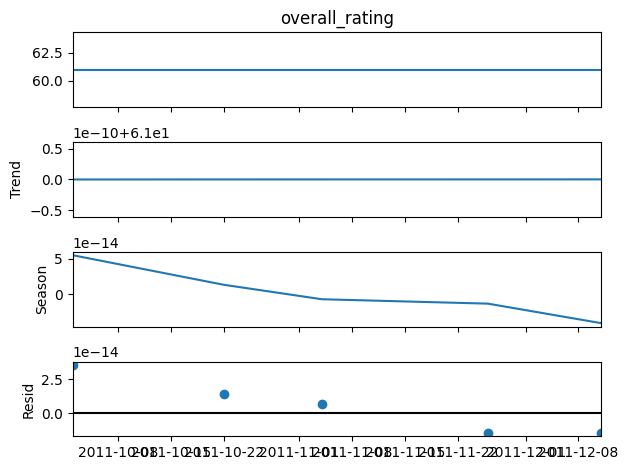

In [15]:
player_id = random_id

# Paso 1: Verificar existencia del jugador
if player_id not in df["player_api_id"].values:
    print("Jugador no encontrado. Revisa el ID.")
else:
    # Paso 2: Filtrar datos del jugador
    player_data_raw = df[df["player_api_id"] == player_id][["match_date", "overall_rating"]]

    # Paso 3: Manejar nulos (ejemplo: eliminar)
    player_data = player_data_raw.dropna()

    if player_data.empty:
        print("No hay datos válidos después de eliminar nulos.")
    else:
        try:
            # Paso 4: Parsear fechas
            player_data["match_date"] = pd.to_datetime(player_data["match_date"])
            player_data = player_data.set_index("match_date").sort_index()

            # Paso 5: Eliminar duplicados de fechas
            player_data = player_data.loc[~player_data.index.duplicated(keep="last")]

            # Paso 6: Establecer frecuencia diaria (opcional)
            player_data = player_data.asfreq("D", fill_value=np.nan)

            # Mostrar datos
            print("Datos procesados de: ",f"ID: {random_id} | Jugador: {random_name} \n", player_data.head())

            # Realizar descomposición STL
            decomposition = STL(player_data["overall_rating"].dropna(), period=4).fit()
            decomposition.plot()

        except Exception as e:
            print(f" Error durante el procesamiento: {str(e)}")

In [16]:
!pip install kmapper

In [17]:
df.head()

,match_date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,player_api_id,overall_rating,potential,acceleration,stamina,team_long_name,league_name,country_name,threshold,exceptional
0,2009-09-13 00:00:00,9867,8371,2,1,2984,65.0,74.0,67.0,38.0,CD Tenerife,Spain LIGA BBVA,Spain,73.816772,0
1,2009-09-13 00:00:00,9867,8371,2,1,2984,65.0,67.0,67.0,39.0,CD Tenerife,Spain LIGA BBVA,Spain,73.816772,0
2,2009-09-13 00:00:00,9867,8371,2,1,2984,67.0,72.0,70.0,39.0,CD Tenerife,Spain LIGA BBVA,Spain,73.816772,0
3,2009-09-13 00:00:00,9867,8371,2,1,2984,73.0,74.0,70.0,39.0,CD Tenerife,Spain LIGA BBVA,Spain,73.816772,0
4,2009-09-23 00:00:00,9867,8315,1,0,2984,65.0,74.0,67.0,38.0,CD Tenerife,Spain LIGA BBVA,Spain,73.816772,0


In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import kmapper as km

# --- PREPARACIÓN DEL DF ---

# 0) Asegurarnos de que match_date es datetime
df['match_date'] = pd.to_datetime(df['match_date'])

# 1) Crear day_of_season como día del año (1–365/366)
df['day_of_season'] = df['match_date'].dt.dayofyear

# --- PIPELINE DE TDA ---

# 2) Define tus features y extrae X_raw
features = [
    'overall_rating',
    'potential',
    'acceleration',
    'stamina',
    'day_of_season'
]
X_raw = df[features].values

# 3) Imputar NaN → media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_raw)

# 4) Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5) Calcular el lens con PCA (2 componentes)
pca = PCA(n_components=2)
lens = pca.fit_transform(X_scaled)

# Mostrar resultados numéricos de PCA
print("PCA components (2 principales):")
print(pca.components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Lens (primeras 5 observaciones):")
print(lens[:25])

# 6) Clustering global con DBSCAN y asignación de etiquetas
dbscan = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = dbscan.fit_predict(X_scaled)
# Añadir etiquetas al DataFrame original df
df['global_cluster'] = cluster_labels

# Mostrar algunas etiquetas
print("\nGlobal DBSCAN cluster labels (primeras 5 filas):")
print(df[['match_date', 'global_cluster']].head())

# Conteo de puntos por cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
print("\nConteo por cluster:")
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} muestras")

# 7) Initialize KeplerMapper and map using X_scaled (sin NaN) y el lens
mapper = km.KeplerMapper()  # This line was missing
graph = mapper.map(
    lens,
    X_scaled,
    cover=km.Cover(n_cubes=8, perc_overlap=0.4),
    clusterer=dbscan
)

# 8) Visualizar en HTML
mapper.visualize(
    graph,
    path_html="mapper_player_performance.html",
    title="TDA: Rendimientos de jugadores",
    color_values=df['exceptional'].values,
    color_function_name="Excepcional (0/1)"
)

print("Mapa generado en mapper_player_performance.html")

PCA components (2 principales):
[[ 0.61030339  0.62382871  0.40868415  0.26662225 -0.01604222]
 [-0.33986477 -0.28477067  0.49070142  0.7071405   0.25012404]]
Explained variance ratio: [0.41760114 0.22890471]
Lens (primeras 5 observaciones):
[[-0.04307807  0.84586489]
 [-0.60066971  1.16616267]
 [ 0.06758175  1.02603786]
 [ 0.67233899  0.70586169]
 [-0.0444678   0.86753315]
 [-0.60205945  1.18783093]
 [ 0.06619201  1.04770613]
 [ 0.67094925  0.72752996]
 [-0.04585754  0.88920142]
 [-0.60344919  1.2094992 ]
 [ 0.06480227  1.06937439]
 [ 0.66955952  0.74919822]
 [-0.04891497  0.9368716 ]
 [-0.60650662  1.25716938]
 [ 0.06174485  1.11704458]
 [ 0.66650209  0.79686841]
 [-0.05072163  0.96504034]
 [-0.60831328  1.28533813]
 [ 0.05993819  1.14521332]
 [ 0.66469543  0.82503715]
 [-0.05266726  0.99537592]
 [-0.61025891  1.3156737 ]
 [ 0.05799255  1.17554889]
 [ 0.66274979  0.85537272]
 [-0.05475187  1.02787831]]

Global DBSCAN cluster labels (primeras 5 filas):
  match_date  global_cluster
0 2